<a href="https://colab.research.google.com/github/renqiu-chen/CSYE7200-1/blob/master/info6105_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [2]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 10.8 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=6df41a5e77d52cf01b70ffbad6299f01d3a64832fd2c2af0814267d72499e11d
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompat

In [3]:
url='https://raw.githubusercontent.com/renqiu-chen/INFO6105-Notebooks/main/high_diamond_ranked_10min.csv'
data = pd.read_csv(url)
data = data[['blueWins','blueTotalExperience','blueTotalGold','blueKills','blueDeaths','blueAssists','redTotalExperience','redTotalGold','redKills','redDeaths','redAssists']]

# What are the data types?
All numeric data

In [4]:
data.head()

,blueWins,blueTotalExperience,blueTotalGold,blueKills,blueDeaths,blueAssists,redTotalExperience,redTotalGold,redKills,redDeaths,redAssists
0,0,17039,17210,9,6,11,17047,16567,6,9,8
1,0,16265,14712,5,5,5,17438,17620,5,5,2
2,0,16221,16113,7,11,4,17254,17285,11,7,14
3,0,17954,15157,4,5,5,17961,16478,5,4,10
4,0,18543,16400,6,6,6,18313,17404,6,6,7


# Are there missing values?

In [5]:
data.isnull().sum()

blueWins               0
blueTotalExperience    0
blueTotalGold          0
blueKills              0
blueDeaths             0
blueAssists            0
redTotalExperience     0
redTotalGold           0
redKills               0
redDeaths              0
redAssists             0
dtype: int64

No, there are no missing values

# What are the likely distributions of the numeric variables?

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 576x360 with 0 Axes>

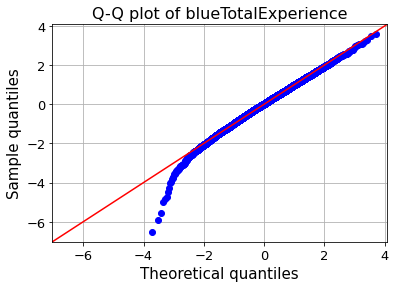

<Figure size 576x360 with 0 Axes>

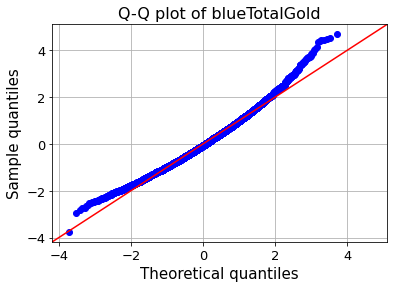

<Figure size 576x360 with 0 Axes>

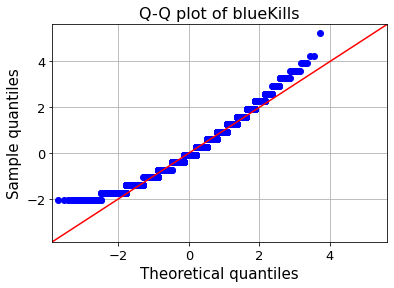

<Figure size 576x360 with 0 Axes>

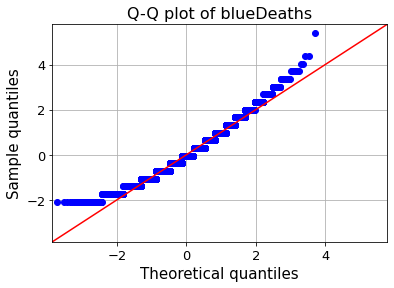

<Figure size 576x360 with 0 Axes>

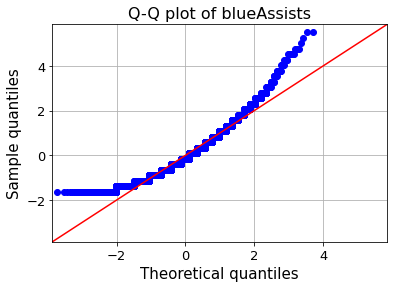

<Figure size 576x360 with 0 Axes>

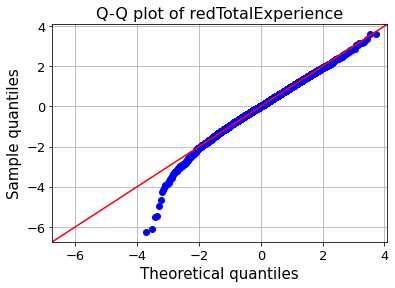

<Figure size 576x360 with 0 Axes>

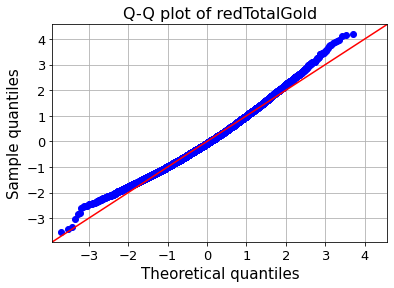

<Figure size 576x360 with 0 Axes>

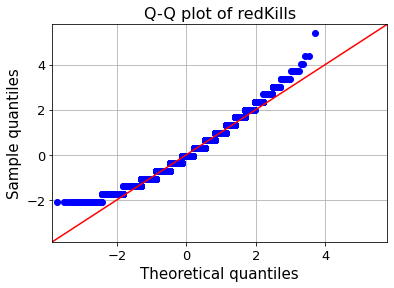

<Figure size 576x360 with 0 Axes>

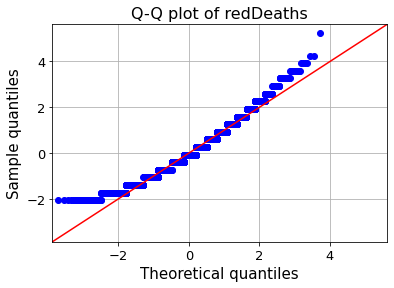

<Figure size 576x360 with 0 Axes>

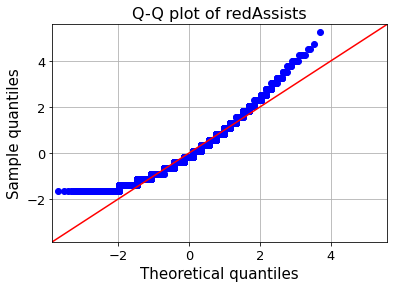

In [6]:
from statsmodels.graphics.gofplots import qqplot
data_norm=data[['blueTotalExperience','blueTotalGold','blueKills','blueDeaths','blueAssists','redTotalExperience','redTotalGold','redKills','redDeaths','redAssists']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

*   All data conform to normal distribution
*   Only the data of "total experience" slightly deviates from the normal distribution when the data is small




<AxesSubplot:>

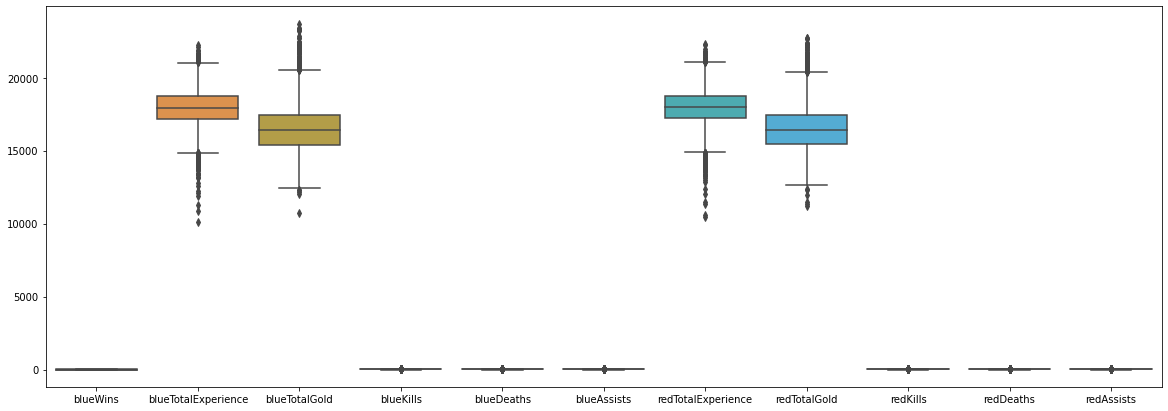

In [7]:
plt.figure(figsize=(20,7))
sns.boxplot(data=data)

In [8]:
# Normalizing the data in the rings column beacuse the value is too high when compared to other independent variable

from sklearn import preprocessing

# Create x to store scaled values as floats
bExp = data[['blueTotalExperience']].values.astype(float)
bGold = data[['blueTotalGold']].values.astype(float)
rExp = data[['redTotalExperience']].values.astype(float)
rGold = data[['redTotalGold']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
bExp_scaled = min_max_scaler.fit_transform(bExp)
rExp_scaled = min_max_scaler.fit_transform(rExp)
bGold_scaled = min_max_scaler.fit_transform(bGold)
rGold_scaled = min_max_scaler.fit_transform(rGold)


# Run the normalizer on the dataframe
data[['blueTotalExperience']] = pd.DataFrame(bExp_scaled)
data[['redTotalExperience']] = pd.DataFrame(rExp_scaled)
data[['blueTotalGold']] = pd.DataFrame(bGold_scaled)
data[['redTotalGold']] = pd.DataFrame(rGold_scaled)

In [9]:
data.head()

,blueWins,blueTotalExperience,blueTotalGold,blueKills,blueDeaths,blueAssists,redTotalExperience,redTotalGold,redKills,redDeaths,redAssists
0,0,0.572406,0.499576,9,6,11,0.557608,0.464844,6,9,8
1,0,0.508577,0.306993,5,5,5,0.590732,0.556250,5,5,2
2,0,0.504948,0.415003,7,11,4,0.575144,0.527170,11,7,14
3,0,0.647864,0.341300,4,5,5,0.635039,0.457118,5,4,10
4,0,0.696437,0.437129,6,6,6,0.664859,0.537500,6,6,7


<AxesSubplot:>

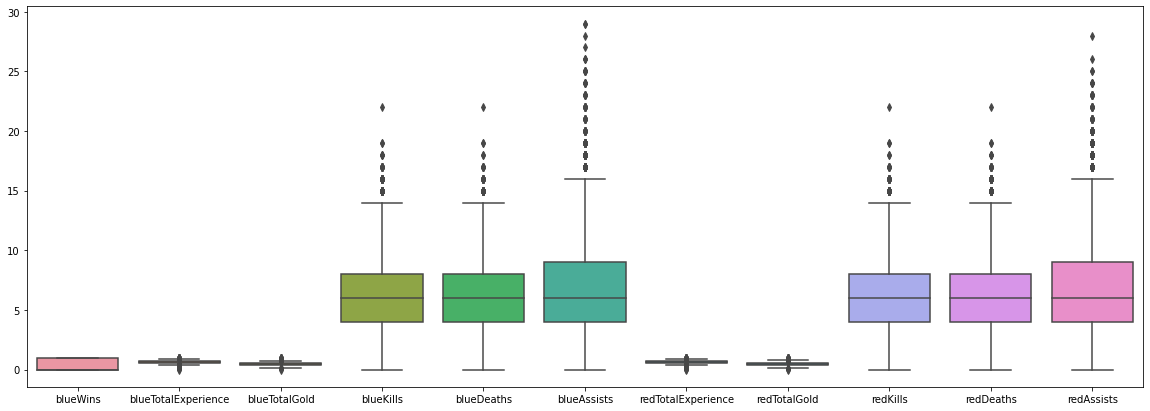

In [10]:
plt.figure(figsize=(20,7))
sns.boxplot(data=data)

# Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

In [11]:
data.corr()

,blueWins,blueTotalExperience,blueTotalGold,blueKills,blueDeaths,blueAssists,redTotalExperience,redTotalGold,redKills,redDeaths,redAssists
blueWins,1.000000,0.396141,0.417213,0.337358,-0.339297,0.276685,-0.387588,-0.411396,-0.339297,0.337358,-0.271047
blueTotalExperience,0.396141,1.000000,0.676193,0.472155,-0.460122,0.303022,-0.281446,-0.485059,-0.460122,0.472155,-0.397254
blueTotalGold,0.417213,0.676193,1.000000,0.888751,-0.162572,0.748352,-0.491268,-0.314212,-0.162572,0.888751,-0.128921
blueKills,0.337358,0.472155,0.888751,1.000000,0.004044,0.813667,-0.462333,-0.161127,0.004044,1.000000,-0.020344
blueDeaths,-0.339297,-0.460122,-0.162572,0.004044,1.000000,-0.026372,0.464584,0.885728,1.000000,0.004044,0.804023
blueAssists,0.276685,0.303022,0.748352,0.813667,-0.026372,1.000000,-0.396652,-0.133948,-0.026372,0.813667,-0.007481
redTotalExperience,-0.387588,-0.281446,-0.491268,-0.462333,0.464584,-0.396652,1.000000,0.669646,0.464584,-0.462333,0.279788
redTotalGold,-0.411396,-0.485059,-0.314212,-0.161127,0.885728,-0.133948,0.669646,1.000000,0.885728,-0.161127,0.736215
redKills,-0.339297,-0.460122,-0.162572,0.004044,1.000000,-0.026372,0.464584,0.885728,1.000000,0.004044,0.804023
redDeaths,0.337358,0.472155,0.888751,1.000000,0.004044,0.813667,-0.462333,-0.161127,0.004044,1.000000,-0.020344


<AxesSubplot:>

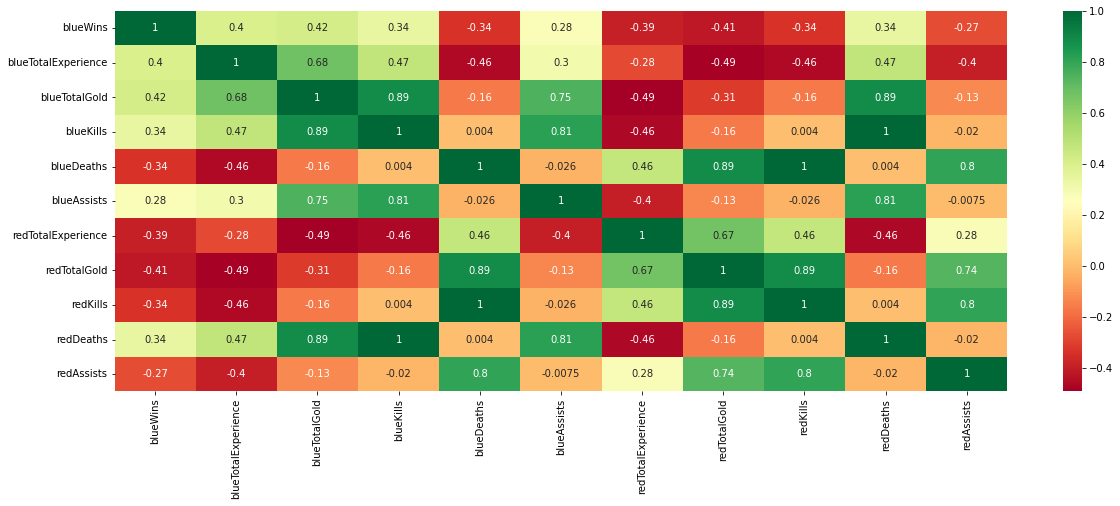

In [12]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

From the table or thermodynamic diagram, we can see that all variables play a significant role in predicting which side will win in the end. Most of the values are concentrated around 0.35

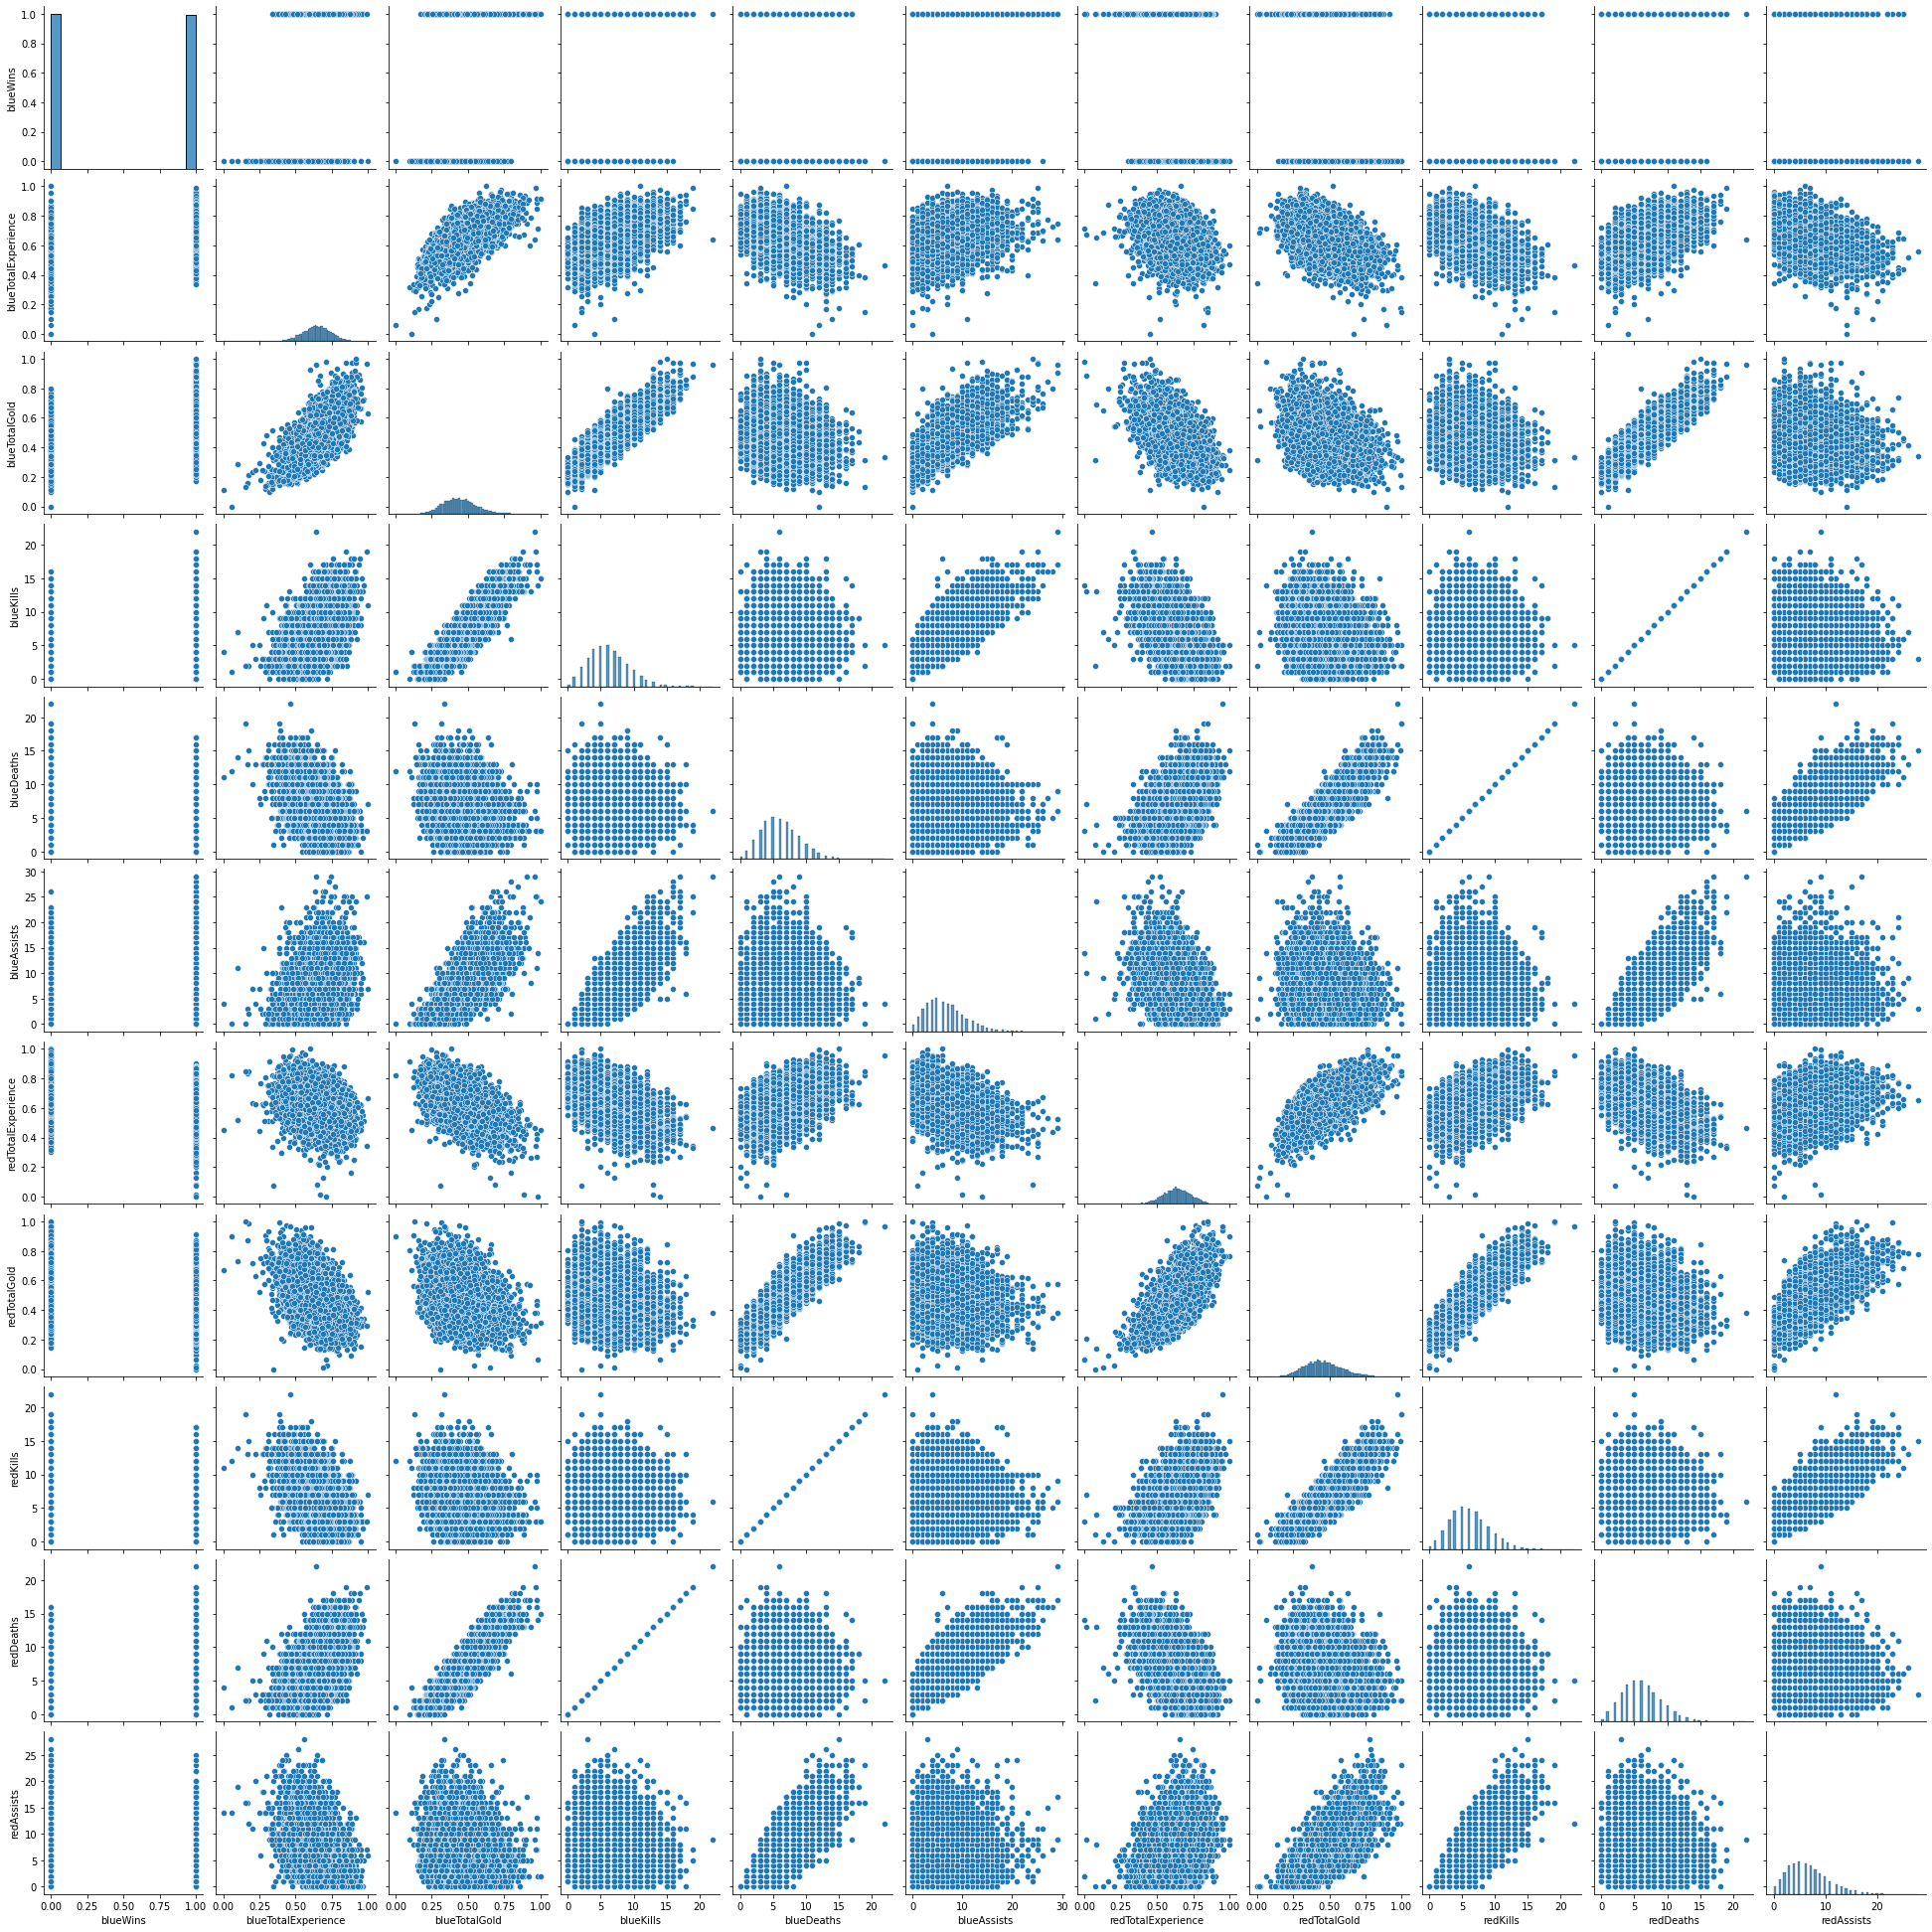

In [13]:
sns.pairplot(data) 

Correlation matrix and heatmap shows that there is multicollinearity between the independent variables. Red kill and blue death or Blue kill and red death repesents the same value. So we can just choose Blue kills and Blue death and drop Red kills and Red death


In [14]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=8)
X = data[ ['blueTotalExperience','blueTotalGold','blueKills','blueDeaths','blueAssists','redTotalExperience','redTotalGold','redKills','redDeaths','redAssists']]
y = data['blueWins']
selector = rfe.fit(X, y)
selector.support_

array([ True,  True, False, False,  True,  True,  True,  True,  True,
        True])

From the REF method, we can see that the number of deaths is relatively unimportant data among these variables, but we can see that it is highly correlated with the results in the thermal diagram, so we keep it

# Building the Model


## Train ,Validation and Test split

In [15]:
from sklearn.model_selection import  train_test_split

X = data[['blueTotalExperience','blueTotalGold','blueKills','blueDeaths','blueAssists','redTotalExperience','redTotalGold','redAssists']]

y = data['blueWins']


X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

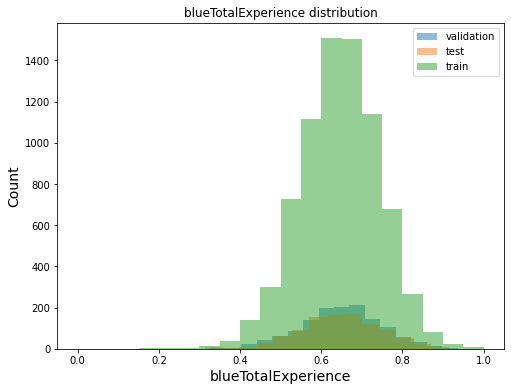

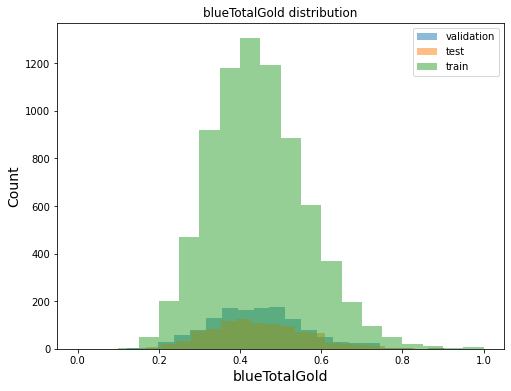

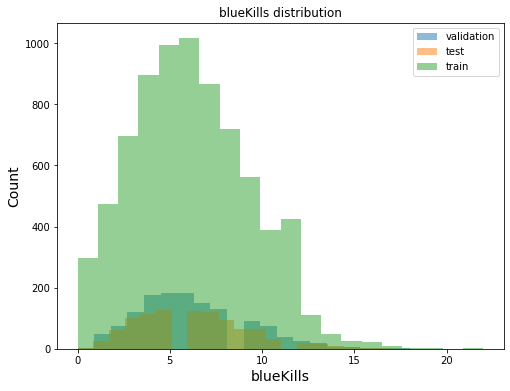

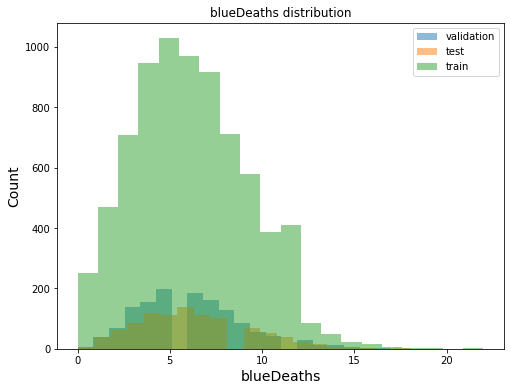

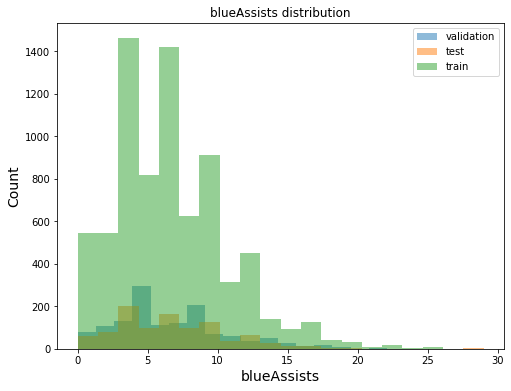

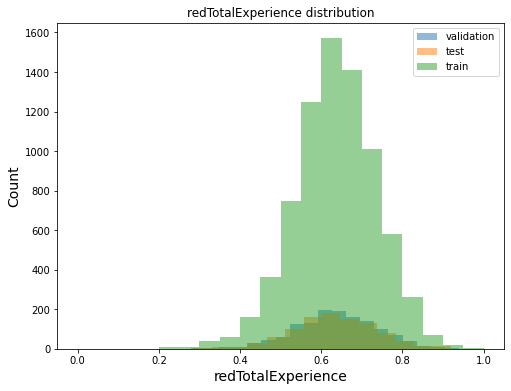

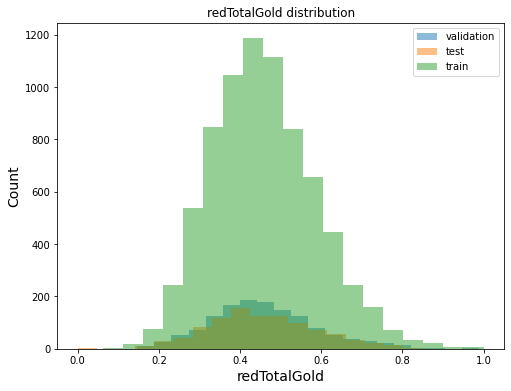

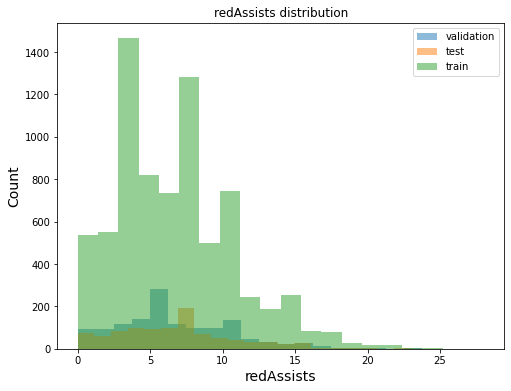

In [16]:
X_test_plot = X_test[['blueTotalExperience','blueTotalGold','blueKills','blueDeaths','blueAssists','redTotalExperience','redTotalGold','redAssists']]

X_val_plot = X_val[['blueTotalExperience','blueTotalGold','blueKills','blueDeaths','blueAssists','redTotalExperience','redTotalGold','redAssists']]

X_train_plot = X_train[['blueTotalExperience','blueTotalGold','blueKills','blueDeaths','blueAssists','redTotalExperience','redTotalGold','redAssists']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

In [17]:
decisionTreeClassifier = DecisionTreeClassifier()
decisionTreeClassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# Make predictions using the training set
y_pred = decisionTreeClassifier.predict(X_train)
confusionMatrix=confusion_matrix(y_train, y_pred)
print('Confusion matrix: \n', confusionMatrix)
score = accuracy_score(y_train,y_pred)
print('Accuracy: %.2f'% score)

Confusion matrix: 
 [[3794    0]
 [   0 3763]]
Accuracy: 1.00


In [19]:
y_pred = decisionTreeClassifier.predict(X_test)
confusionMatrix=confusion_matrix(y_test, y_pred)
print('Confusion matrix: \n', confusionMatrix)
score = accuracy_score(y_test,y_pred)
print('Accuracy: %.2f'% score)

Confusion matrix: 
 [[313 181]
 [178 316]]
Accuracy: 0.64


In [20]:
y_pred = decisionTreeClassifier.predict(X_val)
confusionMatrix=confusion_matrix(y_val, y_pred)
print('Confusion matrix: \n', confusionMatrix)
score = accuracy_score(y_val,y_pred)
print('Accuracy: %.2f'% score)

Confusion matrix: 
 [[426 235]
 [246 427]]
Accuracy: 0.64


In [21]:
#Understanding the important features 
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(decisionTreeClassifier, random_state=5).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0733 ± 0.0272,redTotalGold
0.0682 ± 0.0279,blueTotalGold
0.0421 ± 0.0191,blueDeaths
0.0298 ± 0.0165,redTotalExperience
0.0298 ± 0.0217,blueTotalExperience
0.0087 ± 0.0116,redAssists
0.0071 ± 0.0148,blueKills
-0.0043 ± 0.0077,blueAssists


## Which predictor variables are the most important?


Ranking as following:
1.   redTotalGold
2.   blueTotalGold
3.   blueDeaths
4.   blueKills
5.   redAssist
6.   redTotalExperience
7.   redTotalExperience



## Which independent variables have missing data? How much?

No independent variables have any missing data

## Do the training and test sets have the same data?
Yes, most of the data in the test, training and validation data sets are the same

## In the predictor variables independent of all the other predictor variables?

No, they are not independent of each other. Some variables reperesent the same meaning

## Do the ranges of the predictor variables make sense?


*   Yes, the range of these data is consistent with the state of a game in the first ten minutes. The number of killings is basically below 10, and the economy is around 18000
*   If one party leads in economy, experience and killing, it can lead the team to the final victory


## What are the distributions of the predictor variables?

All data basically conform to normal distribution. Only economy and experience may have a slippery slope, and some values are abnormally low

# Data imputation

## 1% random data remove

### Fill the data with mean

In [22]:
dataLost=data.copy(deep=True)
for col in dataLost.columns:
  if col!="blueWins":
    dataLost.loc[dataLost.sample(frac=0.01).index, col] = np.nan
dataLost.isnull().sum()

blueWins                0
blueTotalExperience    99
blueTotalGold          99
blueKills              99
blueDeaths             99
blueAssists            99
redTotalExperience     99
redTotalGold           99
redKills               99
redDeaths              99
redAssists             99
dtype: int64

In [23]:
for (colName,colData) in dataLost.iteritems():
  colData.fillna(colData.mean(), inplace=True)
dataLost.isnull().sum()

blueWins               0
blueTotalExperience    0
blueTotalGold          0
blueKills              0
blueDeaths             0
blueAssists            0
redTotalExperience     0
redTotalGold           0
redKills               0
redDeaths              0
redAssists             0
dtype: int64

In [24]:
diff=data-dataLost

In [25]:
diff.std()

blueWins               0.000000
blueTotalExperience    0.010063
blueTotalGold          0.011792
blueKills              0.320333
blueDeaths             0.291634
blueAssists            0.422945
redTotalExperience     0.009191
redTotalGold           0.012872
redKills               0.274179
redDeaths              0.254454
redAssists             0.379316
dtype: float64

In [26]:
np.mean(diff)

blueWins               0.000000
blueTotalExperience    0.000055
blueTotalGold          0.000049
blueKills             -0.002475
blueDeaths            -0.002212
blueAssists           -0.001520
redTotalExperience     0.000193
redTotalGold           0.000108
redKills              -0.000167
redDeaths             -0.000533
redAssists            -0.000976
dtype: float64

### Fill gaps forward or backward

In [27]:
dataLost=data.copy(deep=True)
for col in dataLost.columns:
  if col!="blueWins":
    dataLost.loc[dataLost.sample(frac=0.01).index, col] = np.nan
dataLost.isnull().sum()

blueWins                0
blueTotalExperience    99
blueTotalGold          99
blueKills              99
blueDeaths             99
blueAssists            99
redTotalExperience     99
redTotalGold           99
redKills               99
redDeaths              99
redAssists             99
dtype: int64

In [28]:
for (colName,colData) in dataLost.iteritems():
  colData.fillna(colData.mean(), inplace=True)
dataLost.isnull().sum()

blueWins               0
blueTotalExperience    0
blueTotalGold          0
blueKills              0
blueDeaths             0
blueAssists            0
redTotalExperience     0
redTotalGold           0
redKills               0
redDeaths              0
redAssists             0
dtype: int64

In [29]:
diff=data-dataLost

In [30]:
diff.std()

blueWins               0.000000
blueTotalExperience    0.010481
blueTotalGold          0.010748
blueKills              0.311062
blueDeaths             0.328431
blueAssists            0.384475
redTotalExperience     0.010153
redTotalGold           0.013918
redKills               0.306282
redDeaths              0.291162
redAssists             0.460473
dtype: float64

In [31]:
np.mean(diff)

blueWins               0.000000
blueTotalExperience    0.000036
blueTotalGold          0.000002
blueKills              0.000797
blueDeaths            -0.000882
blueAssists           -0.001929
redTotalExperience    -0.000090
redTotalGold          -0.000108
redKills               0.004332
redDeaths              0.002024
redAssists             0.005670
dtype: float64

### Fill gaps with correspongding win result

In [32]:
dataLost=data.copy(deep=True)
for col in dataLost.columns:
  if col!="blueWins":
    dataLost.loc[dataLost.sample(frac=0.01).index, col] = np.nan
dataLost.isnull().sum()

blueWins                0
blueTotalExperience    99
blueTotalGold          99
blueKills              99
blueDeaths             99
blueAssists            99
redTotalExperience     99
redTotalGold           99
redKills               99
redDeaths              99
redAssists             99
dtype: int64

In [33]:
dataBlueWin=dataLost[dataLost.blueWins==1]
dataBlueWinMean=dataBlueWin.mean()
dataRedWin=dataLost[dataLost.blueWins==0]
dataRedWinMean=dataRedWin.mean()

In [34]:
for (rowName,rowData) in dataLost.iterrows():
  if rowData['blueWins']==0:
    for (colName,colData) in rowData.iteritems():
      if colName!="blueWins" and pd.isna(colData):
        dataLost.at[rowName,colName]=dataBlueWinMean[colName]
  else:
    for (colName,colData) in rowData.iteritems():
      if colName!="redWins" and pd.isna(colData):
        dataLost.at[rowName,colName]=dataRedWinMean[colName]
dataLost.isnull().sum()

blueWins               0
blueTotalExperience    0
blueTotalGold          0
blueKills              0
blueDeaths             0
blueAssists            0
redTotalExperience     0
redTotalGold           0
redKills               0
redDeaths              0
redAssists             0
dtype: int64

In [35]:
diff=data-dataLost

In [36]:
diff.std()

blueWins               0.000000
blueTotalExperience    0.012756
blueTotalGold          0.012678
blueKills              0.406225
blueDeaths             0.364134
blueAssists            0.431667
redTotalExperience     0.011552
redTotalGold           0.015935
redKills               0.367640
redDeaths              0.326457
redAssists             0.429279
dtype: float64

In [37]:
np.mean(diff)

blueWins               0.000000
blueTotalExperience   -0.000015
blueTotalGold         -0.000014
blueKills              0.000989
blueDeaths            -0.002565
blueAssists            0.004517
redTotalExperience     0.000103
redTotalGold           0.000107
redKills               0.001470
redDeaths              0.003846
redAssists            -0.004561
dtype: float64

### Fill the data with sciki-learn

In [38]:
dataLost=data.copy(deep=True)
for col in dataLost.columns:
  if col!="blueWins":
    dataLost.loc[dataLost.sample(frac=0.01).index, col] = np.nan
dataLost.isnull().sum()

blueWins                0
blueTotalExperience    99
blueTotalGold          99
blueKills              99
blueDeaths             99
blueAssists            99
redTotalExperience     99
redTotalGold           99
redKills               99
redDeaths              99
redAssists             99
dtype: int64

In [39]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan)
idf=pd.DataFrame(imp.fit_transform(dataLost))
idf.columns=dataLost.columns
idf.index=dataLost.index
idf.isnull().sum()

blueWins               0
blueTotalExperience    0
blueTotalGold          0
blueKills              0
blueDeaths             0
blueAssists            0
redTotalExperience     0
redTotalGold           0
redKills               0
redDeaths              0
redAssists             0
dtype: int64

In [40]:
diff=data-idf

In [41]:
diff.std()

blueWins               0.000000
blueTotalExperience    0.010385
blueTotalGold          0.011128
blueKills              0.313887
blueDeaths             0.291246
blueAssists            0.392459
redTotalExperience     0.011064
redTotalGold           0.013056
redKills               0.321675
redDeaths              0.353826
redAssists             0.394513
dtype: float64

In [42]:
np.mean(diff)

blueWins               0.000000
blueTotalExperience    0.000035
blueTotalGold          0.000038
blueKills              0.002637
blueDeaths            -0.001394
blueAssists            0.001138
redTotalExperience    -0.000252
redTotalGold          -0.000084
redKills              -0.002212
redDeaths              0.007954
redAssists             0.000864
dtype: float64

## 5% random data remove

### Fill the data with mean

In [43]:
dataLost=data.copy(deep=True)
for col in dataLost.columns:
  if col!="blueWins":
    dataLost.loc[dataLost.sample(frac=0.05).index, col] = np.nan
dataLost.isnull().sum()

blueWins                 0
blueTotalExperience    494
blueTotalGold          494
blueKills              494
blueDeaths             494
blueAssists            494
redTotalExperience     494
redTotalGold           494
redKills               494
redDeaths              494
redAssists             494
dtype: int64

In [44]:
for (colName,colData) in dataLost.iteritems():
  colData.fillna(colData.mean(), inplace=True)
dataLost.isnull().sum()

blueWins               0
blueTotalExperience    0
blueTotalGold          0
blueKills              0
blueDeaths             0
blueAssists            0
redTotalExperience     0
redTotalGold           0
redKills               0
redDeaths              0
redAssists             0
dtype: int64

In [45]:
diff=data-dataLost

In [46]:
diff.std()

blueWins               0.000000
blueTotalExperience    0.021637
blueTotalGold          0.024623
blueKills              0.674353
blueDeaths             0.654185
blueAssists            0.945856
redTotalExperience     0.022676
redTotalGold           0.028710
redKills               0.635133
redDeaths              0.686209
redAssists             0.886679
dtype: float64

In [47]:
np.mean(diff)

blueWins               0.000000
blueTotalExperience    0.000357
blueTotalGold          0.000359
blueKills              0.000654
blueDeaths             0.002450
blueAssists            0.004403
redTotalExperience    -0.000038
redTotalGold           0.000106
redKills               0.004688
redDeaths              0.002892
redAssists            -0.001820
dtype: float64

### Fill gaps forward or backward

In [48]:
dataLost=data.copy(deep=True)
for col in dataLost.columns:
  if col!="blueWins":
    dataLost.loc[dataLost.sample(frac=0.05).index, col] = np.nan
dataLost.isnull().sum()

blueWins                 0
blueTotalExperience    494
blueTotalGold          494
blueKills              494
blueDeaths             494
blueAssists            494
redTotalExperience     494
redTotalGold           494
redKills               494
redDeaths              494
redAssists             494
dtype: int64

In [49]:
for (colName,colData) in dataLost.iteritems():
  colData.fillna(colData.mean(), inplace=True)
dataLost.isnull().sum()

blueWins               0
blueTotalExperience    0
blueTotalGold          0
blueKills              0
blueDeaths             0
blueAssists            0
redTotalExperience     0
redTotalGold           0
redKills               0
redDeaths              0
redAssists             0
dtype: int64

In [50]:
diff=data-dataLost

In [51]:
diff.std()

blueWins               0.000000
blueTotalExperience    0.023061
blueTotalGold          0.026120
blueKills              0.684867
blueDeaths             0.641268
blueAssists            0.924824
redTotalExperience     0.021970
redTotalGold           0.028226
redKills               0.656211
redDeaths              0.707851
redAssists             0.879711
dtype: float64

In [52]:
np.mean(diff)

blueWins               0.000000
blueTotalExperience   -0.000095
blueTotalGold         -0.000155
blueKills             -0.016075
blueDeaths             0.001384
blueAssists           -0.011154
redTotalExperience    -0.000175
redTotalGold          -0.000035
redKills               0.003942
redDeaths              0.005556
redAssists            -0.000648
dtype: float64

### Fill gaps with correspongding win result

In [53]:
dataLost=data.copy(deep=True)
for col in dataLost.columns:
  if col!="blueWins":
    dataLost.loc[dataLost.sample(frac=0.05).index, col] = np.nan
dataLost.isnull().sum()

blueWins                 0
blueTotalExperience    494
blueTotalGold          494
blueKills              494
blueDeaths             494
blueAssists            494
redTotalExperience     494
redTotalGold           494
redKills               494
redDeaths              494
redAssists             494
dtype: int64

In [54]:
dataBlueWin=dataLost[dataLost.blueWins==1]
dataBlueWinMean=dataBlueWin.mean()
dataRedWin=dataLost[dataLost.blueWins==0]
dataRedWinMean=dataRedWin.mean()

In [55]:
for (rowName,rowData) in dataLost.iterrows():
  if rowData['blueWins']==0:
    for (colName,colData) in rowData.iteritems():
      if colName!="blueWins" and pd.isna(colData):
        dataLost.at[rowName,colName]=dataBlueWinMean[colName]
  else:
    for (colName,colData) in rowData.iteritems():
      if colName!="redWins" and pd.isna(colData):
        dataLost.at[rowName,colName]=dataRedWinMean[colName]
dataLost.isnull().sum()

blueWins               0
blueTotalExperience    0
blueTotalGold          0
blueKills              0
blueDeaths             0
blueAssists            0
redTotalExperience     0
redTotalGold           0
redKills               0
redDeaths              0
redAssists             0
dtype: int64

In [56]:
diff=data-dataLost

In [57]:
diff.std()

blueWins               0.000000
blueTotalExperience    0.027328
blueTotalGold          0.034513
blueKills              0.809971
blueDeaths             0.805758
blueAssists            0.983629
redTotalExperience     0.027487
redTotalGold           0.035716
redKills               0.757161
redDeaths              0.802744
redAssists             1.042700
dtype: float64

In [58]:
np.mean(diff)

blueWins               0.000000
blueTotalExperience   -0.000204
blueTotalGold         -0.000184
blueKills              0.005443
blueDeaths            -0.008107
blueAssists            0.002377
redTotalExperience     0.000419
redTotalGold          -0.000244
redKills               0.005324
redDeaths              0.009838
redAssists            -0.018861
dtype: float64

### Fill the data with sciki-learn

In [59]:
dataLost=data.copy(deep=True)
for col in dataLost.columns:
  if col!="blueWins":
    dataLost.loc[dataLost.sample(frac=0.05).index, col] = np.nan
dataLost.isnull().sum()

blueWins                 0
blueTotalExperience    494
blueTotalGold          494
blueKills              494
blueDeaths             494
blueAssists            494
redTotalExperience     494
redTotalGold           494
redKills               494
redDeaths              494
redAssists             494
dtype: int64

In [60]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan)
idf=pd.DataFrame(imp.fit_transform(dataLost))
idf.columns=dataLost.columns
idf.index=dataLost.index
idf.isnull().sum()

blueWins               0
blueTotalExperience    0
blueTotalGold          0
blueKills              0
blueDeaths             0
blueAssists            0
redTotalExperience     0
redTotalGold           0
redKills               0
redDeaths              0
redAssists             0
dtype: int64

In [61]:
diff=data-idf

In [62]:
diff.std()

blueWins               0.000000
blueTotalExperience    0.023581
blueTotalGold          0.026078
blueKills              0.673532
blueDeaths             0.629231
blueAssists            0.936995
redTotalExperience     0.021196
redTotalGold           0.028199
redKills               0.616014
redDeaths              0.621794
redAssists             0.940088
dtype: float64

In [63]:
np.mean(diff)

blueWins               0.000000
blueTotalExperience   -0.000182
blueTotalGold         -0.000064
blueKills              0.001507
blueDeaths            -0.007673
blueAssists           -0.004122
redTotalExperience     0.000179
redTotalGold           0.000008
redKills              -0.002984
redDeaths             -0.008722
redAssists             0.014695
dtype: float64

## 10% random data remove

### Fill the data with mean

In [64]:
dataLost=data.copy(deep=True)
for col in dataLost.columns:
  if col!="blueWins":
    dataLost.loc[dataLost.sample(frac=0.1).index, col] = np.nan
dataLost.isnull().sum()

blueWins                 0
blueTotalExperience    988
blueTotalGold          988
blueKills              988
blueDeaths             988
blueAssists            988
redTotalExperience     988
redTotalGold           988
redKills               988
redDeaths              988
redAssists             988
dtype: int64

In [65]:
for (colName,colData) in dataLost.iteritems():
  colData.fillna(colData.mean(), inplace=True)
dataLost.isnull().sum()

blueWins               0
blueTotalExperience    0
blueTotalGold          0
blueKills              0
blueDeaths             0
blueAssists            0
redTotalExperience     0
redTotalGold           0
redKills               0
redDeaths              0
redAssists             0
dtype: int64

In [66]:
diff=data-dataLost

In [67]:
diff.std()

blueWins               0.000000
blueTotalExperience    0.031153
blueTotalGold          0.036684
blueKills              0.938347
blueDeaths             0.901420
blueAssists            1.287479
redTotalExperience     0.032390
redTotalGold           0.041635
redKills               0.924405
redDeaths              0.934977
redAssists             1.297840
dtype: float64

In [68]:
np.mean(diff)

blueWins               0.000000
blueTotalExperience    0.000660
blueTotalGold         -0.000455
blueKills             -0.001206
blueDeaths             0.004497
blueAssists            0.016605
redTotalExperience    -0.000003
redTotalGold          -0.000423
redKills              -0.001914
redDeaths              0.002281
redAssists             0.021014
dtype: float64

### Fill gaps forward or backward

In [69]:
dataLost=data.copy(deep=True)
for col in dataLost.columns:
  if col!="blueWins":
    dataLost.loc[dataLost.sample(frac=0.1).index, col] = np.nan
dataLost.isnull().sum()

blueWins                 0
blueTotalExperience    988
blueTotalGold          988
blueKills              988
blueDeaths             988
blueAssists            988
redTotalExperience     988
redTotalGold           988
redKills               988
redDeaths              988
redAssists             988
dtype: int64

In [70]:
for (colName,colData) in dataLost.iteritems():
  colData.fillna(colData.mean(), inplace=True)
dataLost.isnull().sum()

blueWins               0
blueTotalExperience    0
blueTotalGold          0
blueKills              0
blueDeaths             0
blueAssists            0
redTotalExperience     0
redTotalGold           0
redKills               0
redDeaths              0
redAssists             0
dtype: int64

In [71]:
diff=data-dataLost

In [72]:
diff.std()

blueWins               0.000000
blueTotalExperience    0.031244
blueTotalGold          0.035918
blueKills              0.951602
blueDeaths             0.942033
blueAssists            1.293711
redTotalExperience     0.031606
redTotalGold           0.042419
redKills               0.913411
redDeaths              0.949617
redAssists             1.296051
dtype: float64

In [73]:
np.mean(diff)

blueWins               0.000000
blueTotalExperience   -0.000153
blueTotalGold         -0.000241
blueKills             -0.011103
blueDeaths             0.005960
blueAssists            0.020654
redTotalExperience    -0.000166
redTotalGold           0.000608
redKills               0.010121
redDeaths             -0.006942
redAssists             0.014715
dtype: float64

### Fill gaps with correspongding win result

In [74]:
dataLost=data.copy(deep=True)
for col in dataLost.columns:
  if col!="blueWins":
    dataLost.loc[dataLost.sample(frac=0.1).index, col] = np.nan
dataLost.isnull().sum()

blueWins                 0
blueTotalExperience    988
blueTotalGold          988
blueKills              988
blueDeaths             988
blueAssists            988
redTotalExperience     988
redTotalGold           988
redKills               988
redDeaths              988
redAssists             988
dtype: int64

In [75]:
dataBlueWin=dataLost[dataLost.blueWins==1]
dataBlueWinMean=dataBlueWin.mean()
dataRedWin=dataLost[dataLost.blueWins==0]
dataRedWinMean=dataRedWin.mean()

In [76]:
for (rowName,rowData) in dataLost.iterrows():
  if rowData['blueWins']==0:
    for (colName,colData) in rowData.iteritems():
      if colName!="blueWins" and pd.isna(colData):
        dataLost.at[rowName,colName]=dataBlueWinMean[colName]
  else:
    for (colName,colData) in rowData.iteritems():
      if colName!="redWins" and pd.isna(colData):
        dataLost.at[rowName,colName]=dataRedWinMean[colName]
dataLost.isnull().sum()

blueWins               0
blueTotalExperience    0
blueTotalGold          0
blueKills              0
blueDeaths             0
blueAssists            0
redTotalExperience     0
redTotalGold           0
redKills               0
redDeaths              0
redAssists             0
dtype: int64

In [77]:
diff=data-dataLost

In [78]:
diff.std()

blueWins               0.000000
blueTotalExperience    0.037838
blueTotalGold          0.044736
blueKills              1.143106
blueDeaths             1.048907
blueAssists            1.386181
redTotalExperience     0.038695
redTotalGold           0.050335
redKills               1.073588
redDeaths              1.093124
redAssists             1.419682
dtype: float64

In [79]:
np.mean(diff)

blueWins               0.000000
blueTotalExperience    0.000403
blueTotalGold         -0.000534
blueKills             -0.004975
blueDeaths             0.001577
blueAssists           -0.012020
redTotalExperience    -0.000714
redTotalGold           0.000351
redKills              -0.004786
redDeaths             -0.019515
redAssists            -0.002908
dtype: float64

### Fill the data with sciki-learn

In [80]:
dataLost=data.copy(deep=True)
for col in dataLost.columns:
  if col!="blueWins":
    dataLost.loc[dataLost.sample(frac=0.1).index, col] = np.nan
dataLost.isnull().sum()

blueWins                 0
blueTotalExperience    988
blueTotalGold          988
blueKills              988
blueDeaths             988
blueAssists            988
redTotalExperience     988
redTotalGold           988
redKills               988
redDeaths              988
redAssists             988
dtype: int64

In [81]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan)
idf=pd.DataFrame(imp.fit_transform(dataLost))
idf.columns=dataLost.columns
idf.index=dataLost.index
idf.isnull().sum()

blueWins               0
blueTotalExperience    0
blueTotalGold          0
blueKills              0
blueDeaths             0
blueAssists            0
redTotalExperience     0
redTotalGold           0
redKills               0
redDeaths              0
redAssists             0
dtype: int64

In [82]:
diff=data-idf

In [83]:
diff.std()

blueWins               0.000000
blueTotalExperience    0.031297
blueTotalGold          0.037293
blueKills              0.974889
blueDeaths             0.927037
blueAssists            1.270686
redTotalExperience     0.031383
redTotalGold           0.040504
redKills               0.870496
redDeaths              0.978834
redAssists             1.274233
dtype: float64

In [84]:
np.mean(diff)

blueWins               0.000000
blueTotalExperience    0.000091
blueTotalGold         -0.000095
blueKills              0.011504
blueDeaths             0.014283
blueAssists            0.000296
redTotalExperience    -0.000210
redTotalGold          -0.000660
redKills              -0.004388
redDeaths              0.003181
redAssists            -0.002606
dtype: float64

## Conclusion
The three methods have achieved very good results. They have different performances in different data types. It is still necessary to choose the method of data filling according to the actual situation

# License

*Authors*
Renqiu Chen


License text below

 -----


All code in this note is available as open source through the MIT license.

All text and images are free to use under the Creative Commons Attribution 3.0 license.  https://creativecommons.org/licenses/by/3.0/us/

These licenses let others distribute, remix, tweak, and build upon the work, even commercially, as long as they give credit for the original creation.

Copyright 2021 AI Skunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# Reference

1.   Refered Towards Data Science2.   
2.   Eli5 official documentation
3.   Sckit learn offcial documentation

The algorithms were referred directly from the Sckit learn official documentation. Visualization was referred from the Machine Learning with scikit-learn Quick Start Guide and Towards Data Science (How do you check the quality of your regression model in Python?). The remaining code was written independently. Feature importance reference is taken from eli5 offical documnetation

